# Reddit TimeZone

In [1]:
%reload_ext autoreload
%autoreload 2

from DataCollection import DataCollection
from ML import ML
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

import numpy as np
import lightgbm as lgb


/anaconda2/envs/reddit_DS_py36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
path = '/Users/rizki/Documents/Projects/withDeclan/reddit_DS/'
folder = 'savedat/'
dataset = 'ALL_Oct26_Nov4-2018/'

# path = '/Users/rizki/Google Drive/Rizki_Declan_project/'
# folder = 'Rizki data/'
# dataset = ''

In [3]:
def aggCities(path_to_files):
    allfiles = glob.glob(path_to_files+'/*.csv')
    #print(allfiles)

    df_list = []
    cols = []
    for i,file in enumerate(allfiles):
        if i==0:
            df_temp = pd.read_csv(file,index_col=0)
            col = df_temp.columns.values
        df = pd.read_csv(file,header=0,index_col=0)
        df_list.append(df)

    df_all = pd.DataFrame(columns=cols)
    df_all = pd.concat(df_list)

    cities = df_all['subreddit'].unique()
    long_str_cities = ''
    for c in cities: long_str_cities = '{}_{}'.format(long_str_cities,c)
    
    l = list(df_all.columns.values)
    bins = len([e for e in l if 'bin' in e])

    save_name = path+folder+dataset+'aggregate_{}bins{}.csv'.format(bins,long_str_cities)
    df_all.to_csv(save_name)    
    
    return df_all

df_all = aggCities(path+folder+dataset)
df_all.groupby('subreddit')['bin0'].count()

subreddit
auckland        498
bangkok         499
detroit         499
dublin          497
houston         498
kazakhstan      499
oman            499
pakistan        498
paris           498
riodejaneiro    499
saltlakecity    497
seattle         498
seoul           499
shanghai        497
tasmania        498
venezuela       494
Name: bin0, dtype: int64

In [4]:
df_all.head()

,user,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,...,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,subreddit
0,louiseber,42.0,32.0,10.0,6.0,2.0,2.0,9.0,18.0,14.0,...,44.0,52.0,51.0,62.0,68.0,76.0,69.0,63.0,48.0,dublin
1,Tadhg,66.0,23.0,12.0,6.0,0.0,0.0,0.0,11.0,27.0,...,39.0,61.0,40.0,59.0,54.0,78.0,50.0,75.0,76.0,dublin
2,PurpleWomat,1.0,1.0,1.0,8.0,16.0,13.0,44.0,31.0,49.0,...,134.0,67.0,48.0,50.0,19.0,22.0,12.0,4.0,4.0,dublin
3,IrishFlukey,6.0,2.0,1.0,0.0,0.0,0.0,0.0,19.0,155.0,...,72.0,62.0,16.0,15.0,20.0,13.0,11.0,21.0,20.0,dublin
4,CaptainEarlobe,72.0,15.0,3.0,0.0,0.0,0.0,1.0,4.0,12.0,...,20.0,32.0,50.0,61.0,90.0,90.0,115.0,145.0,144.0,dublin


In [5]:
df_all.groupby('subreddit').sum()

,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23
subreddit,,,,,,,,,,,,,,,,,,,,,
auckland,22312.0,22088.0,21660.0,21713.0,20924.0,19929.0,19877.0,19889.0,20326.0,21501.0,...,4306.0,3191.0,3177.0,4590.0,9508.0,15642.0,20155.0,22589.0,22530.0,22314.0
bangkok,6486.0,7615.0,9329.0,10507.0,10895.0,10826.0,10985.0,10254.0,10207.0,9852.0,...,11422.0,11526.0,10763.0,9279.0,7905.0,6809.0,5951.0,5552.0,4863.0,5586.0
detroit,20151.0,21662.0,22476.0,20251.0,16345.0,11928.0,7964.0,5211.0,3729.0,2885.0,...,23783.0,26243.0,27746.0,27916.0,27386.0,27384.0,26030.0,22290.0,19649.0,19459.0
dublin,14048.0,9801.0,6432.0,4817.0,3496.0,3364.0,5033.0,8279.0,13255.0,16315.0,...,21947.0,22681.0,21816.0,20823.0,20450.0,20884.0,21476.0,22195.0,22056.0,19387.0
houston,21570.0,22581.0,25257.0,23421.0,19686.0,14797.0,10440.0,6689.0,4550.0,3016.0,...,26973.0,31447.0,33408.0,32010.0,33076.0,32642.0,32220.0,30783.0,25803.0,21899.0
kazakhstan,2568.0,2546.0,2661.0,2932.0,3113.0,3063.0,2814.0,2853.0,2804.0,2477.0,...,4148.0,4157.0,4182.0,4269.0,4132.0,4088.0,4147.0,3737.0,3006.0,2604.0
oman,2591.0,2549.0,2824.0,3132.0,3408.0,3888.0,3918.0,3907.0,3806.0,4011.0,...,4916.0,5260.0,5076.0,5192.0,5239.0,5068.0,4400.0,3960.0,3473.0,3033.0
pakistan,12024.0,11556.0,12114.0,13301.0,14517.0,14954.0,15639.0,15351.0,14038.0,14231.0,...,20786.0,22909.0,23811.0,24051.0,24003.0,22666.0,20619.0,18027.0,15621.0,13704.0
paris,10253.0,7875.0,6766.0,5981.0,5530.0,6047.0,8395.0,11213.0,14244.0,16012.0,...,19160.0,19859.0,19271.0,17926.0,17311.0,17075.0,17413.0,17327.0,15927.0,12799.0


['/Users/rizki/Documents/Projects/withDeclan/reddit_DS/savedat/ALL_Oct26_Nov4-2018/aggregate_24bins_dublin_oman_seoul_kazakhstan_riodejaneiro_auckland_houston_saltlakecity_shanghai_tasmania_pakistan_seattle_venezuela_paris_bangkok_detroit.csv']


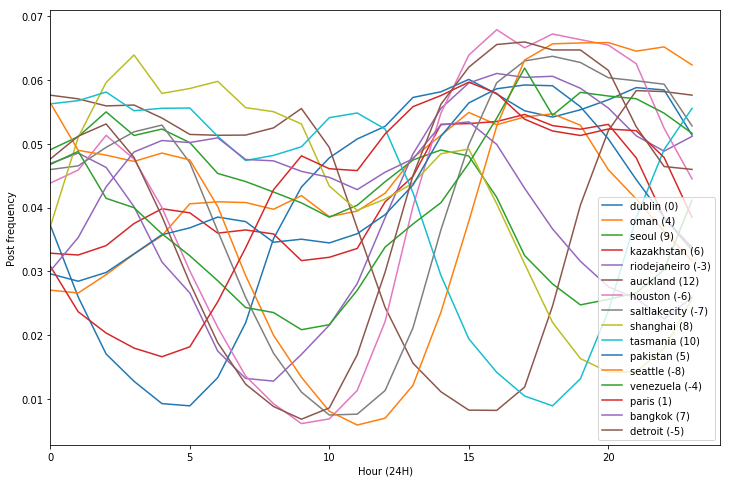

,user,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,...,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,subreddit
0,louiseber,42.0,32.0,10.0,6.0,2.0,2.0,9.0,18.0,14.0,...,44.0,52.0,51.0,62.0,68.0,76.0,69.0,63.0,48.0,dublin
1,Tadhg,66.0,23.0,12.0,6.0,0.0,0.0,0.0,11.0,27.0,...,39.0,61.0,40.0,59.0,54.0,78.0,50.0,75.0,76.0,dublin
2,PurpleWomat,1.0,1.0,1.0,8.0,16.0,13.0,44.0,31.0,49.0,...,134.0,67.0,48.0,50.0,19.0,22.0,12.0,4.0,4.0,dublin
3,IrishFlukey,6.0,2.0,1.0,0.0,0.0,0.0,0.0,19.0,155.0,...,72.0,62.0,16.0,15.0,20.0,13.0,11.0,21.0,20.0,dublin
4,CaptainEarlobe,72.0,15.0,3.0,0.0,0.0,0.0,1.0,4.0,12.0,...,20.0,32.0,50.0,61.0,90.0,90.0,115.0,145.0,144.0,dublin


In [6]:
ml = ML(path+folder+dataset)

ml.postAvgTimesByRegion()

ml.getData().head()

In [7]:
# ml.addTzCol()
# train_df = ml.getData()
# train_df = train_df.drop(columns=['user','subreddit'])
# train_df

# from sklearn.model_selection import KFold
# kf = KFold(5,shuffle=True,random_state=1234)

# models = []
# for tr_ind,val_ind in kf.split(train_df):
#     df_tr, df_val = train_df.iloc[tr_ind,:],train_df.iloc[val_ind,:]
#     x_tr = df_tr.drop(columns=['tz'])
#     x_val = df_val.drop(columns=['tz'])
#     y_tr = df_tr['tz']
#     y_val = df_val['tz']
#     lgb_model = ml.run_lightgbm(x_tr,x_val,y_tr,y_val)
#     models.append(lgb_model)

#lgb_model = models[3]

In [8]:
#Boosted Decision Tree - lighgbm -  Cyclic Loss Function

x_tr,x_val,y_tr,y_val = ml.trainTestSplit()
lgb_model = ml.run_lightgbm(x_tr,x_val,y_tr,y_val)

In [10]:
y_tr_pred = lgb_model.predict(x_tr)
y_val_pred = lgb_model.predict(x_val)

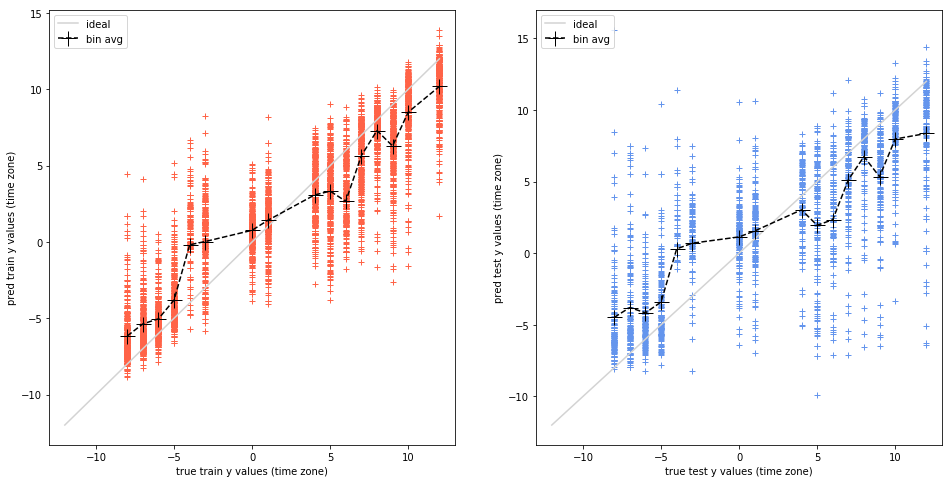

In [11]:
ml.plot_y_ypred(y_tr,y_tr_pred,y_val,y_val_pred)

In [12]:

def approx_accuracy(y,ypred,tolerance):    
    #calculating how many predictions got exactly the right zone (within tolerance), 
    #takes absolute value of the difference after rounding 
    
    abs_rounded_err = abs(np.round(y) - np.round(ypred))
    tolerated = len(abs_rounded_err[abs_rounded_err<=tolerance])
    approx_accuracy = tolerated / len(y_pred)        

    print(round(approx_accuracy,2))

    return approx_accuracy



In [13]:
acc_tr = ml.approx_accuracy(y_tr,y_tr_pred,1)

0.51


In [14]:
acc_val = ml.approx_accuracy(y_val,y_val_pred,1)

0.37


In [128]:
#confusion matrix

# class_list = list(x_tr.columns.values)
class_list = [i for i in range(-11,13)]
from sklearn.metrics import confusion_matrix

In [16]:
#plot confusion matrix 

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

np.set_printoptions(precision=2)


In [121]:
# tr_conf_m = confusion_matrix(y_tr.values, np.round(y_tr_pred))
# test_conf_m = confusion_matrix(y_val.values, np.round(y_val_pred))
tr_conf_m = confusion_matrix(y_tr.values, np.round(y_tr_pred),labels=[i for i in range(-11,13)])
test_conf_m = confusion_matrix(y_val.values, np.round(y_val_pred),labels=[i for i in range(-11,13)])


# conf_df_display = pd.DataFrame(tr_conf_m,index=class_list,columns=class_list)
# conf_df_display = conf_df_display.rename_axis('true',axis='index')
# conf_df_display = conf_df_display.rename_axis('pred',axis='columns')
# conf_df_display

Confusion matrix, without normalization


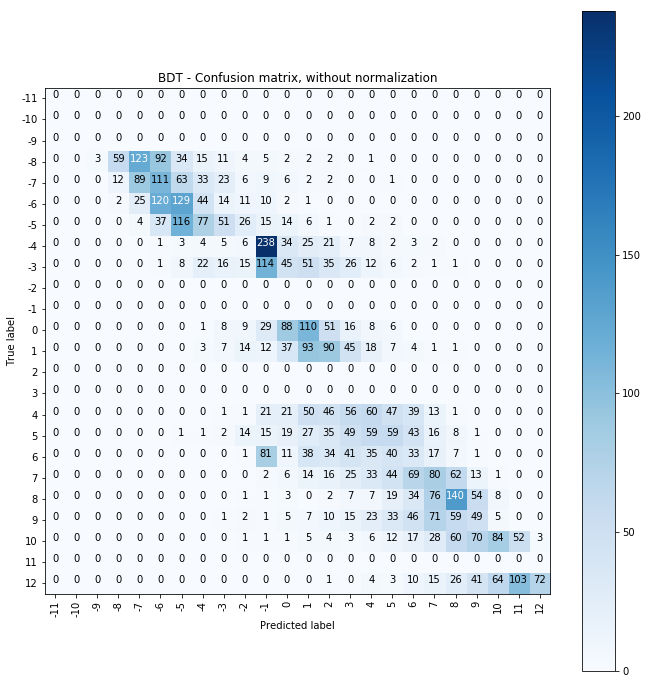

In [129]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(6.4*1.5,6.4*1.5))
plot_confusion_matrix(tr_conf_m, classes=class_list,
                      title='BDT - Confusion matrix, without normalization')


/anaconda2/envs/reddit_DS_py36/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


Normalized confusion matrix


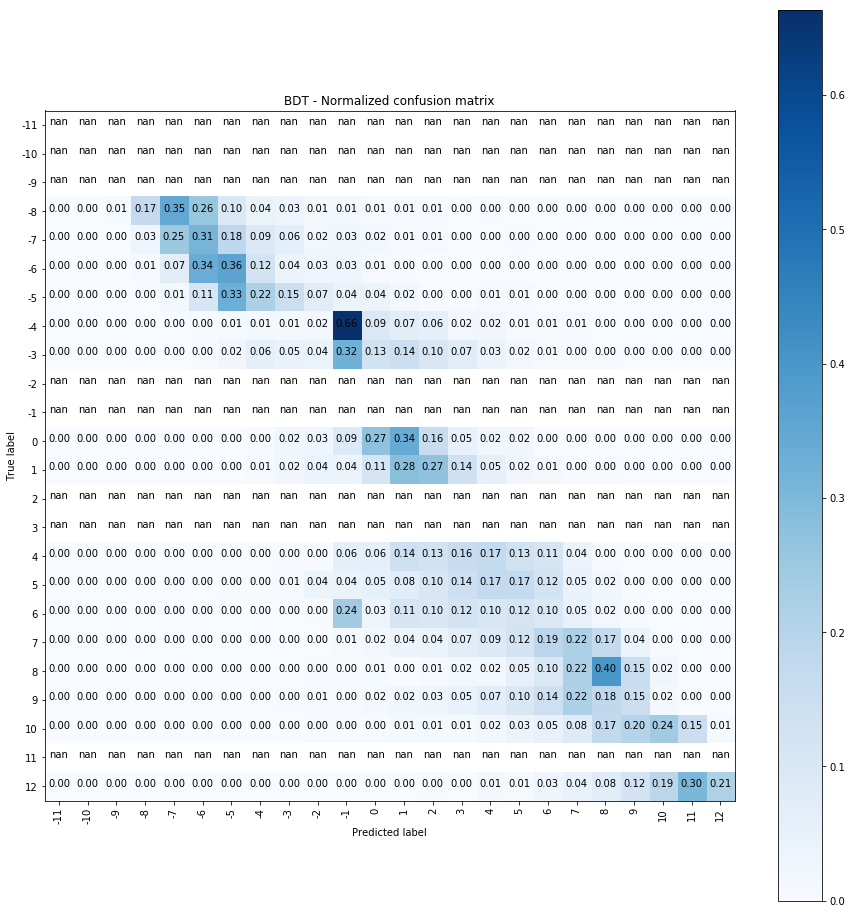

In [130]:
# Plot normalized confusion matrix
plt.figure(figsize=(6.4*2,6.4*2))
plot_confusion_matrix(tr_conf_m, classes=class_list, normalize=True,
                      title='BDT - Normalized confusion matrix')

# plt.show()

Dataframe already has tz column!


iteration 0/1000, loss: 44.77
iteration 100/1000, loss: 37.78
iteration 200/1000, loss: 38.10
iteration 300/1000, loss: 38.38
iteration 400/1000, loss: 38.55
iteration 500/1000, loss: 37.99
iteration 600/1000, loss: 38.02
iteration 700/1000, loss: 37.46
iteration 800/1000, loss: 37.66
iteration 900/1000, loss: 37.62


final W values: [-0.03  0.   -0.04  0.01  0.03 -0.02  0.03  0.05  0.08  0.01  0.05  0.
  0.02 -0.02 -0.   -0.02 -0.05 -0.06 -0.03  0.    0.01 -0.02 -0.    0.  ]

Loss from test data set: 39.4347


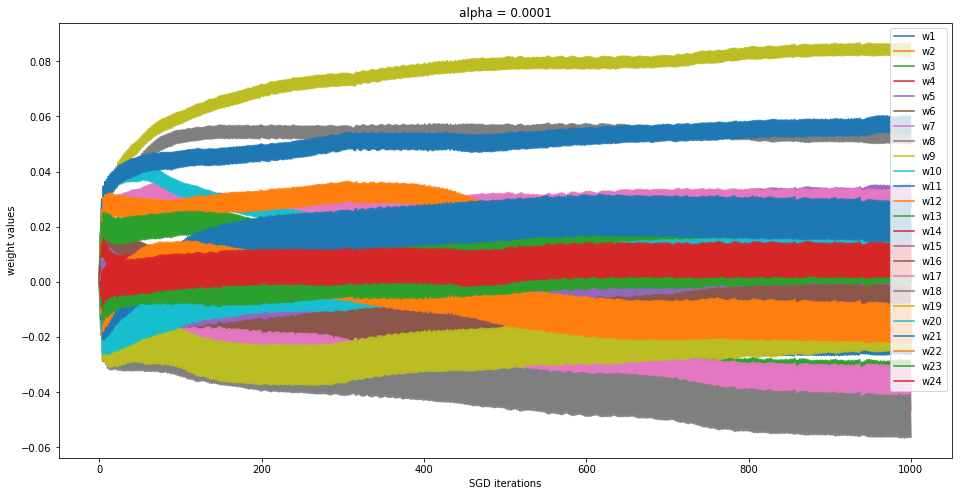

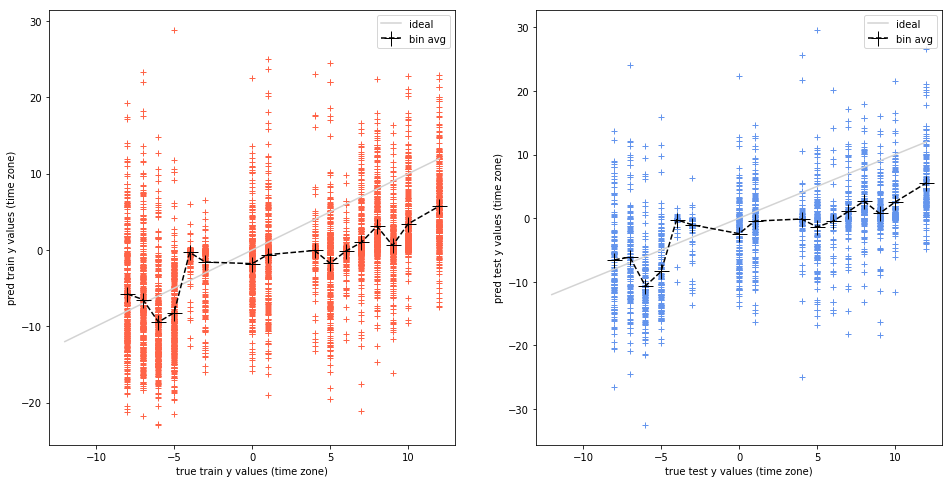

In [19]:
# Linear Reg with PyTorch - Stochastic Gradient Descent - Cyclic Loss Function 

sgd_y_tr_pred, sgd_y_val_pred = ml.cyclicMetricSGD()

In [133]:
#correct for y_pred > 12, y_pred < -11:
sgd_y_tr_pred_corr = sgd_y_tr_pred
sgd_y_val_pred_corr = sgd_y_val_pred

#y_tr_pred
sgd_y_tr_pred_corr[sgd_y_tr_pred_corr>12] = sgd_y_tr_pred_corr[sgd_y_tr_pred_corr>12] - 24
sgd_y_tr_pred_corr[sgd_y_tr_pred_corr<-11] = 24 + sgd_y_tr_pred_corr[sgd_y_tr_pred_corr<-11]

#y_val_pred
sgd_y_val_pred_corr[sgd_y_val_pred_corr>12] = sgd_y_val_pred_corr[sgd_y_val_pred_corr>12] - 24
sgd_y_val_pred_corr[sgd_y_val_pred_corr<-11] = 24 + sgd_y_val_pred_corr[sgd_y_val_pred_corr<-11] 

In [134]:
acc_tr = ml.approx_accuracy(y_tr,sgd_y_tr_pred_corr,1)

0.11


In [135]:
acc_val = ml.approx_accuracy(y_val,sgd_y_val_pred_corr,1)

0.1


In [138]:
sgd_tr_conf_m = confusion_matrix(y_tr.values, np.round(sgd_y_tr_pred_corr).astype('int64'),labels=[i for i in range(-11,13)])
sgd_test_conf_m = confusion_matrix(y_val.values, np.round(sgd_y_val_pred_corr).astype('int64'),labels=[i for i in range(-11,13)])

# sgd_conf_df_display = pd.DataFrame(sgd_tr_conf_m,index=class_list,columns=class_list)
# sgd_conf_df_display = sgd_conf_df_display.rename_axis('true',axis='index')
# sgd_conf_df_display = sgd_conf_df_display.rename_axis('pred',axis='columns')
# sgd_conf_df_display

Confusion matrix, without normalization


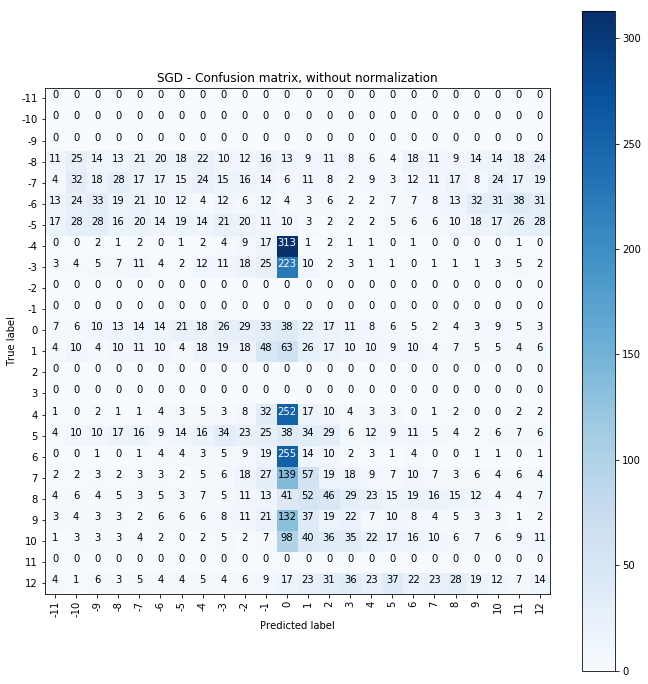

In [139]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(6.4*1.5,6.4*1.5))
plot_confusion_matrix(sgd_tr_conf_m, classes=class_list,
                      title='SGD - Confusion matrix, without normalization')

/anaconda2/envs/reddit_DS_py36/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


Normalized confusion matrix


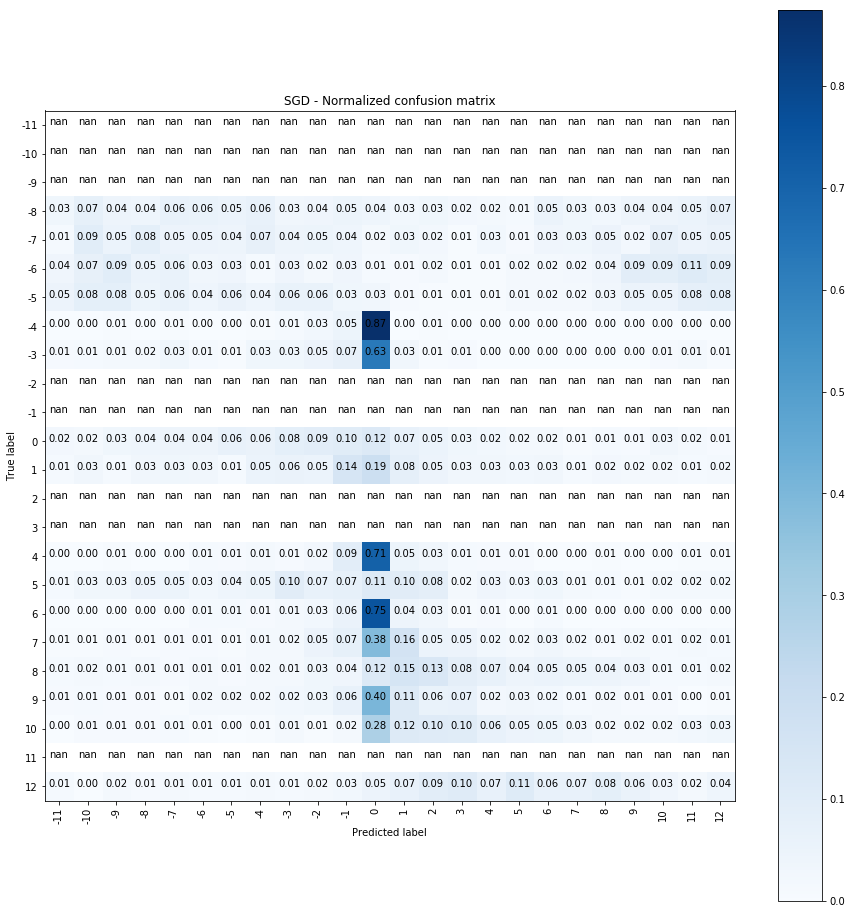

In [140]:
# Plot normalized confusion matrix
plt.figure(figsize=(6.4*2,6.4*2))
plot_confusion_matrix(sgd_tr_conf_m, classes=class_list, normalize=True,
                      title='SGD - Normalized confusion matrix')